# Machine Learning - Desarrollo Caso Practico

Bienvenido, en este notebook, vamos a desarrollar nuestro caso practico usando el modelo que discutimos en las diapositivas. Antes de ello, vamos a familiarizarnos con el entorno. Primero, un __notebook__ es un entorno en donde podemos ejecutar código python, el cogido se escribe en __celdas__, para poder ejecutar el código, debes de primero colocarte sobre la celda (click en ella) y después puedes presionar sobre el botón __Run__ ubicado en la parte superior.

![bar_run](./images/bar_run.png)

Ahora ejecutemos una operación matemática simple, presiona sobre la siguiente __celda__ y a continuación presiona sobre el botón __Run__

In [1]:
(5 * 2) + 10 / 12

10.833333333333334

Genial!, se ha ejecutado correctamente, puedes observar el resultado de la operación: __10.83__, puedes usar el botón __Run__ para ejecutar el código, o, si deseas, también puedes usar la combinación de teclas: __shift + enter__, solamente no olvides posicionarte sobre la __celda__ que deseas ejecutar haciendo click sobre ella.

# Data Set

![](images/house.png)

Este data set contiene información recopilada por el Servicio del Censo de los EE. UU. En relación con la vivienda en el área de Boston Mass; el objetivo es lograr predecir el precio que tendrán los inmuebles usando las siguientes características:

|__N__|__Nombre__|__Descripcion__|
|-----|----------|---------------|
|1|CRIM|Tasa de criminalidad per cápita por ciudad.|
|2|ZN|Proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.|
|3|INDUS|Proporción de acres de negocios no minoristas por ciudad.|
|4|CHAS|Variable ficticia de Charles River (1 si el tramo limita el río, 0 de lo contrario)|
|5|NOX|Concentración de óxidos nítricos (partes por 10 millones)|
|6|RM|Número promedio de habitaciones por vivienda|
|7|EDAD|Proporción de unidades ocupadas por sus propietarios construidas antes de 1940|
|8|DIS|Distancia ponderada a cinco centros de empleo de Boston|
|9|RAD|Índice de accesibilidad a las autopistas radiales|
|10|IMPUESTO|Tasa de impuesto a la propiedad de valor completo por \$ 10,000|
|11|PTRATIO|Proporción alumnos por profesor por ciudad|
|12|LSTAT|Porcentaje de estado inferior de la población|
|13|price|Valor medio de las viviendas ocupadas por sus propietarios en \$ 1000|

__Nota:__ Esta versión contiene una columna menos que la original

# Librerias

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
import seaborn as sea
from scripts_ import *
sea.set()
%matplotlib inline

In [2]:
np.random.seed(5)

# Metodologia Basica

![](./images/basic_methodology.png)

# Raw Data

## Reading

In [3]:
def read_train_data():
    '''Esta funcion lee los datos de entrenamiento
    argumentos
    ---
    regresa
    X, y -- datos de entrenamiento y targets
    '''
    X = pd.read_csv('./data/train_data.csv', sep = ',')
    y = pd.read_csv('./data/y_train.csv', sep = ',')
    
    # INGRESAR SU RESPUESTA DEBAJO
    return X, y

def read_test_data():
    '''
    Esta funcion lee los datos de prueba
    argumentos
    ---
    regresa
    X_test, y_test -- datos de prueba y targets
    '''
    X_test = pd.read_csv('./data/test_data.csv', sep = ',')
    y_test = pd.read_csv('./data/y_test.csv', sep = ',')
    
    # INGRESAR SU RESPUESTA DEBAJO
    return X_test, y_test

## Training Data

In [4]:
X, y = read_train_data()

In [5]:
X.head(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,12.79
1,0.09512,0.0,12.83,0,0.437,6.286,45.0,4.5026,5,398,18.7,8.94
2,1.61282,0.0,8.14,0,0.538,6.096,96.9,3.7598,4,307,21.0,20.34
3,2.14918,0.0,19.58,0,0.871,5.709,98.5,1.6232,5,403,14.7,15.79
4,0.02055,85.0,0.74,0,0.410,6.383,35.7,9.1876,2,313,17.3,5.77
5,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,3.57
6,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,18.13


In [6]:
X.shape

(455, 12)

## Test Data

In [8]:
X_test, y_test = read_test_data()

In [9]:
X_test.shape

(51, 12)

In [10]:
X_test.head(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.38214,0.0,6.20,0,0.504,8.040,86.5,3.2157,8,307,17.4,3.13
1,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,4,245,19.2,4.70
2,0.04684,0.0,3.41,0,0.489,6.417,66.1,3.0923,2,270,17.8,8.81
3,11.10810,0.0,18.10,0,0.668,4.906,100.0,1.1742,24,666,20.2,34.77
4,0.22188,20.0,6.96,1,0.464,7.691,51.8,4.3665,3,223,18.6,6.58
5,25.94060,0.0,18.10,0,0.679,5.304,89.1,1.6475,24,666,20.2,26.64
6,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64


# Pre Processing

In [12]:
def pre_processing(X, y):
    '''
    Esta fucion implementa normalizacion
    argumentos
    X -- datos de entrenamiento
    y -- targets
    
    regresa
    X_norm -- datos normalizados
    norm_data -- normalizador
    '''
    # Ingresa tu codigo en los (...)
    norm_data = Normalizer().fit(X, y)
    X_norm = norm_data.transform(X)
    return X_norm, norm_data

In [13]:
X_norm, norm_data = pre_processing(X, y)

Una vez que tenemos nuestros datos de entrenamiento __normalizados__, echémosle un vistazo, para ver como difieren de los datos de entrenamiento originales y de los datos de prueba. Para ello usaremos __pandas__, en especifico el comando __head(n)__ nos permite visualizar los __n__ primeros elementos de los datos, en este caso vamos a usar __n = 3__.

In [14]:
pd.DataFrame(X_norm).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000827,0.0,0.025317,0.0,0.001691,0.020868,0.149914,0.018579,0.017153,0.984561,0.067238,0.043876
1,0.000237,0.0,0.031964,0.0,0.001089,0.015661,0.112112,0.011218,0.012457,0.991572,0.046589,0.022273
2,0.004986,0.0,0.025165,0.0,0.001663,0.018846,0.299568,0.011624,0.012366,0.949097,0.064922,0.062882


Bien!, ahora es tu turno, utiliza el comando __head__ con un valor __n__ de __3__ para visualizar los datos de entrenamiento __X__

In [15]:
X.head(3) # inserta tu codigo en los (...)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,12.79
1,0.09512,0.0,12.83,0,0.437,6.286,45.0,4.5026,5,398,18.7,8.94
2,1.61282,0.0,8.14,0,0.538,6.096,96.9,3.7598,4,307,21.0,20.34


Ahora hagamos lo mismo con los datos de prueba __X_test__

In [16]:
X_test.head(3) # inserta tu codigo en los (...)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.38214,0.0,6.20,0,0.504,8.040,86.5,3.2157,8,307,17.4,3.13
1,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,4,245,19.2,4.70
2,0.04684,0.0,3.41,0,0.489,6.417,66.1,3.0923,2,270,17.8,8.81


# Training Process

## Split Data

Ya hemos cargando nuestros datos de entrenamiento y prueba (test) respectivamente, no obstante aun necesitamos aplicar la normalización a nuestros datos de prueba, eso lo podemos realizar usando el objeto __norm_data__ que obtuvimos en el proceso de normalización, para ello simplemente tenemos que pasar los datos de prueba __X_test__

In [17]:
X_test_norm = norm_data.transform(X_test)

Antes de proceder comparemos los datos de prueba __X_test__ con su versión normalizada __X_test_norm__, para ello usaremos nuevamente el comando __head(n)__, recuerda usar __n = 3__

In [18]:
pd.DataFrame(X_test_norm).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.001195,0.000000,0.019392,0.0,0.001576,0.025147,0.270548,0.010058,0.025022,0.960212,0.054422,0.009790
1,0.000139,0.307979,0.019056,0.0,0.001582,0.025524,0.090084,0.019698,0.015399,0.943186,0.073915,0.018094
2,0.000168,0.000000,0.012231,0.0,0.001754,0.023016,0.237086,0.011091,0.007174,0.968431,0.063845,0.031600


In [19]:
X_test.head(3) #inserta tu codigo aqui

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.38214,0.0,6.20,0,0.504,8.040,86.5,3.2157,8,307,17.4,3.13
1,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,4,245,19.2,4.70
2,0.04684,0.0,3.41,0,0.489,6.417,66.1,3.0923,2,270,17.8,8.81


Excelente, como podrás notar, los datos normalizados difieren de los datos originales, ya sea en su versión de entrenamiento o prueba, esto se debe a que la normalización __"centra"__ los datos, es decir trata de encontrar el valor en el que se encuentra distribuidos los datos.

## Algorithms

El modelo que usaremos es el descrito en las diapositivas, el cual recibe el nombre de regresión lineal, como vimos, este modelo puede ser aplicado no solo a 1 dimensión, sino que se puede generalizar a varias dimensiones de la siguiente manera:

![model](./images/model.png)

Para definir nuestro modelo seguiremos los siguientes pasos:
1. Primero crearemos una función llamada __linear_regression__

    ```python
    def linear_regression():
    ```

2. Como hemos visto hasta ahora, para que nuestro modelo pueda aprender necesitamos los datos de entrenamiento __X__ y los targets __y__, por ende estos serán las entradas de nuestra función __linear_regression__

    ```python
    def linear_regression(X, y):
    ```
3. Ahora usaremos una variable para definir nuestro modelo llamada __model__

    ```python
    def linear_regression(X, y):
         model = ...
    ```
4. Usando el comando __LinearRegression()__ podemos crear el modelo

    ```python
    def linear_regression(X, y):
         model = LinearRegression()
    ```
5. Debemos definir que hiper-parámetros se usaran; en el caso del modelo de regresión lineal usaremos: __normalize = True__ y __fit_intercept = True__.
    ```python
    def linear_regression(X, y):
         model = LinearRegression(normalize = True, fit_intercept = True)
    ```
6. Una vez hecho eso, podemos entrenar nuestro modelo, para ello usaremos el comando __fit__, el cual recibirá los datos de entrenamiento __X__ y targets __y__
    ```python
    def linear_regression(X, y):
         model = LinearRegression(normalize = True, fit_intercept = True)
         model.fit(X, y)
    ```
7. Finalmente retornamos nuestro modelo entrenado
   ```python
    def linear_regression(X, y):
         model = LinearRegression(normalize = True, fit_intercept = True)
         model.fit(X, y)
         return ...
    ```

In [20]:
def linear_regression(X, y):
    '''
    Esta funcion crea y entrena un modelo de regresion lineal
    argumentos
    X, y -- datos de entrenamiento y targets
    regresa
    model -- modelo de regresion lineal entrenado
    '''
    # INSERTA TU CODIGO DEBAJO
    model = LinearRegression(normalize = True, fit_intercept = True) # they should define the model [True, both]
    # Training
    print('Entrenamiento Iniciado')
    model.fit(X, y)
    print('Entrenamiento Completado')
    return model

## Training

Hora de entrenar nuestro modelo, en este caso vamos a entrenar dos modelos, uno de ellos se entrenara con los datos normalizados y el otro con los datos sin normalizar, recuerda que la __función linear_regression(X, y)__ que hemos definido toma dos argumentos, los datos __X__ y los targets __y__.

In [21]:
# Este modelo usara los datos normalizados X_norm
modelo1 = linear_regression(X_norm, y) # inserta tu codigo en los (...)
# Y el segundo modelo usara los datos sin normalizar X
modelo2 = linear_regression(X, y) # inserta tu codigo en los (...)

Entrenamiento Iniciado
Entrenamiento Completado
Entrenamiento Iniciado
Entrenamiento Completado


## Predictions

Felicidades!, ya has entrenado dos modelos!!, ahora, que tal si hacemos algunas predicciones, para ello debemos recordar que, los modelos necesitan los datos __X__ y __X_norm__ respectivamente para poder realizar predicciones; estos datos los usaremos de la siguiente manera: ___modelo1.predict(...)___. A las predicciones les denominaremos __y_hat__, como tenemos dos modelos, usaremos __y_hat_norm__ para referirnos al modelo que usa los datos normalizados y __y_hat__ para el modelo que usa los datos __X__

### Training

Comencemos con los datos de entrenamiento, para ello usaremos ___modelo1.predict(X)___ para los resultados de __y_hat__, ya que este modelo se entreno usando los datos originales __X__, y para __y_hat_norm__ usaremos ___modelo1.predict(X_norm)___

In [22]:
# Completa los (...)
y_hat = modelo2.predict(X)
y_hat_norm = modelo1.predict(X_norm)

Ahora echemos un vistazo a lo que nuestros modelos predicen!!

In [23]:
results_training = result_table(y, y_hat, y_hat_norm)
results_training.head(7)

,valores y originales,y_hat,y_hat_norm
0,22.2,19.062556,18.804516
1,21.4,23.876561,23.996453
2,13.5,14.276546,14.456355
3,19.4,17.902439,17.751349
4,24.7,25.084858,24.209114
5,43.8,35.226664,38.874021
6,14.1,17.916197,19.099431


__Pregunta de Taller:__ Que observaciones puedes notar?

### Test

Ahora hagamos lo mismo con los datos de prueba, para ello usaremos __X_test__ para __y_hat__ y __X_test_norm__ para __y_hat_norm__

In [24]:
# Completa los (...)
y_hat = modelo2.predict(X_test)
y_hat_norm = modelo1.predict(X_test_norm)

Veamos los resultados

In [25]:
results_test = result_table(y_test, y_hat, y_hat_norm)
results_test.head(7)

,valores y originales,y_hat,y_hat_norm
0,37.6,38.065522,38.695965
1,27.9,32.012522,30.307269
2,22.6,27.220585,26.767393
3,13.8,3.500439,10.134246
4,35.2,35.868174,40.829790
5,10.4,7.284909,10.206643
6,23.9,28.092602,29.118654


__Pregunta de Taller:__ Que observaciones puedes notar?

## Metrics

Como vimos en la definición de machine learning, necesitamos de una forma de medir que tanto nuestro modelo ha aprendido, para ello existen las métricas de evaluación, estas nos permiten determinar dos aspectos fundamentales:

* El nivel de exactitud del modelo
* El nivel de error

En esta oportunidad estaremos usando la métrica __r score__, esta define de la siguiente manera:

![r2_score](./images/r2_score.png)

Ahora vamos a usar esta formula, para ello usaremos la __función r2_score__, esta función toma dos valores:
* y: Los targets originales
* y_hat: Los targets que predice nuestro modelo
Primero vamos a calcular __y_hat__, para ello usaremos la variable __y_hat_tr__ para referirnos a los resultados de los datos de entrenamiento sin normalización y __y_hat_tr_norm__ con normalización respectivamente.

### Training

In [26]:
y_hat_tr_norm= modelo1.predict(X_norm)
y_hat_tr = modelo2.predict(X)

### Test
Ahora procederemos con los datos de prueba, para ello usaremos __y_hat_ts__ sin normalización y __y_hat_ts_norm__ con normalización

In [27]:
y_hat_ts_norm = modelo1.predict(X_test_norm)
y_hat_ts = modelo2.predict(X_test)

Ahora aplicaremos __r score__, recuerda que ya hemos calculado __y__ e __y_hat__

### Training Metrics

Nuestro modelo con normalización en los datos de entrenamiento obtiene un aproximado de __0.72%__ de puntaje

In [28]:
r2_score(y, y_hat_tr_norm)

0.7229693210852297

Mientras que el modelo sin normalización en los datos de entrenamiento obtiene un aproximado de __0.73%__ de puntaje

In [29]:
r2_score(y, y_hat_tr)

0.733123926171427

__Pregunta de Taller:__ Que observaciones puedes notar?

### Test Metrics

No obstante en los datos de prueba el modelo con normalización obtiene __0.83%__ de puntaje

In [30]:
r2_score(y_test, y_hat_ts_norm)

0.8293030922289955

Mientras que nuestro modelo sin normalización solo obtiene un __0.72%__ de puntaje

In [31]:
r2_score(y_test, y_hat_ts)

0.7184173788848401

| Modelo | Datos | r score|
|--------|-------|--------|
| Modelo 1 | Entrenamiento | 0.72|
| Modelo 2 | Entrenamiento | __0.73__|
| Modelo 1 | Prueba | __0.83__|
| Modelo 2 | Prueba | 0.72|

__Pregunta de Taller:__ Que observaciones puedes notar?

# Visualizations

Buen trabajo, ya hemos entrenado y validado nuestro modelo, no obstante aun podemos hacer mas!, en esta sección analizaremos los resultados obtenidos desde una perspectiva mas grafica.

### Training

Ejecuta la siguiente celda para visualizar los resultados en los datos de entrenamiento

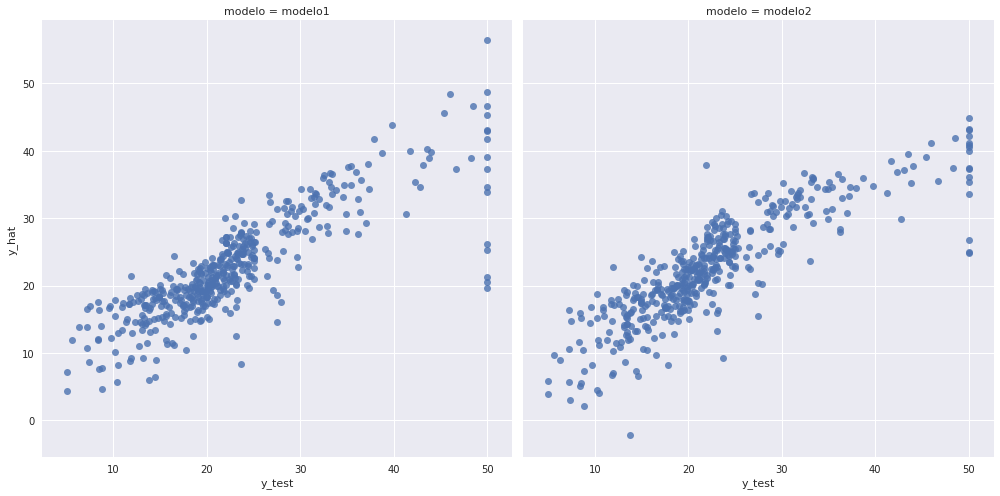

In [32]:
plot_data_train = plot_data_results(y_hat_tr_norm, y_hat_tr, y)
sea.lmplot(x = 'y_test', y = 'y_hat', data = plot_data_train, fit_reg = False, size = 7, col = 'modelo')

### Test

Ahora hagamos lo mismo con los datos de prueba.

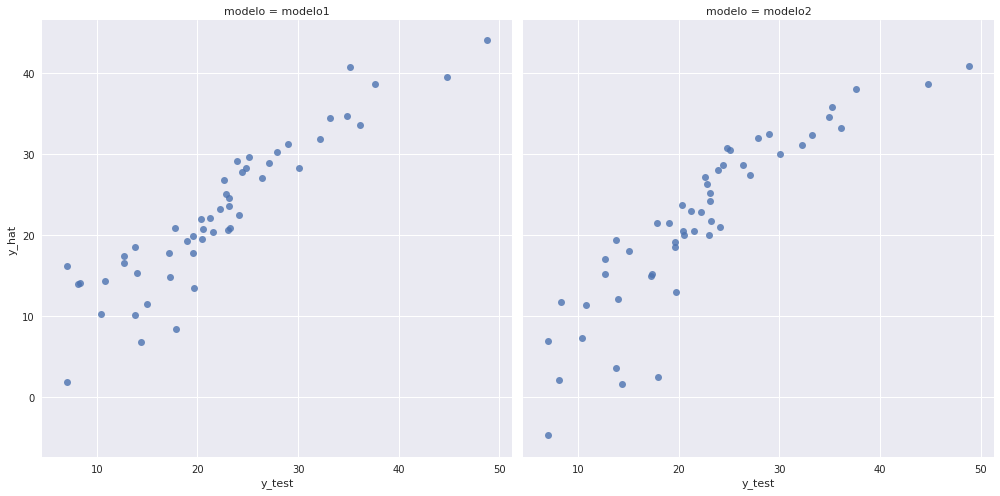

In [33]:
plot_data_test = plot_data_results(y_hat_ts_norm, y_hat_ts, y_test)
sea.lmplot(x = 'y_test', y = 'y_hat', data = plot_data_test, fit_reg = False, size = 7, col = 'modelo')

Perfecto, ya tenemos nuestras visualizaciones, ahora que tal si echamos un vistazo a los __coeficientes__ de nuestros modelos.

In [34]:
coef_data = coef_info(list(X.columns), modelo1.coef_.T, modelo2.coef_.T)
coef_data

,features,coef_modelo1,coef_modelo2
0,CRIM,-131.447736,-0.123935
1,ZN,-16.362026,0.044587
2,INDUS,8.422557,0.010337
3,CHAS,952.353670,3.056300
4,NOX,-4469.143310,-17.208721
5,RM,1737.061185,3.556852
6,AGE,-20.412338,0.007283
7,DIS,-226.668674,-1.429157
8,RAD,27.132901,0.318979
9,TAX,-108.077815,-0.013684


## Conclusiones
Buen trabajo, has entrenado tu primer modelo de __Machine Learning__ :), aquí hay unas cuantas cosas que son importantes recordar:
* El objetivo de Machine Learning es la creación de algoritmos (modelos) que puedan aprender de los datos (como hemos visto en este Taller).
* El algoritmo de regresión lineal que has implementado es capaz de predecir exitosamente los precios de los inmuebles, gracias a que le has brindado datos __X__ y __y__ de donde aprenda.
* Las métricas son usadas para evaluar que tanto nuestros algoritmos (modelos) han aprendido.
* Si bien es cierto las métricas son importantes, usando gráficos podemos obtener información mas detallada acerca de los resultados que obtenemos.

Finalmente, gracias por haber estado presente el día de hoy, esperamos que este Taller haya sido de tu agrado, no olvides visitar (__yappsteam__)[https://www.facebook.com/yappsteam/] en Facebook para enterarte de mas novedades :D